In [1]:
# Imported Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from figure_labeler import *

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">The Deception of Safety: Unmasking Hidden Risks in Road Accidents</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***

In this section, the focus is on road traffic congestion, which stands as an influential factor in the transportation system, particularly in London areas, resulting in high levels of traffic casualties. The analysis delves into the association between traffic congestion and its impacts on road safety, with a concentration on the heightened levels of traffic casualties. Addressing the road issues within a specific London district area involves employing approaches that encompass diverse analyses and understanding of the relationships among variables and contributing factors. Univariate analysis, employing bar and line charts, is conducted to specifically highlight the relationships among certain variables such as road surface condition, weather condition, and vehicle type, all of which are observable in the presented data visualization. The findings aim to identify key variables influencing accident risk within London's complex road network. This analysis can inform targeted interventions to improve public safety and potentially reduce accident-related costs.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

This section addresses the underlying problem discussed and comprehended in the analysis. One of the numerous threats to public safety is road accidents, wherein the district areas of London have perceived varying factors contributing to levels of incidents. The complexity and challenge of London's district area road network substantially contribute to accident rates, presenting diverse challenges in enhancing road safety. This analysis aims to identify specific factors influencing accident risk within these districts, focusing on variables such as the number of casualties, vehicles involved, road surface conditions, weather conditions, and vehicle types.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

In this section, the group states their intent to address the problem associated with road accidents. Ensuring individuals' safety on London's roads is crucial; however, the ongoing threat of traffic accidents demands immediate intervention. By targeting the contributing factors of road accidents, the goal is to enhance public safety by optimizing the traffic management system and reducing costs associated with accidents. The in-depth analysis aims to create a safer community for both residents and tourists.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***

In this section, the dataset used will be stated. The analysis adopts a systematic approach by obtaining the "Road Accident Casualties Dataset: A Comprehensive Dataset for Traffic Incident Research" from Kaggle, authored by Sheen Nezukokamaado.

*Click this for the dataset:* [Dataset Link](https://www.kaggle.com/datasets/nezukokamaado/road-accident-casualties-dataset/data?fbclid=IwAR1ETxsL_U0nEylFXvjO66xZzf75boo5uoUUgefJLvq2BCh1ubn6FCzLp-A)

[ref]: #top
[Back to Table of Contents][ref]

In [3]:
data = pd.read_csv('accident data.csv')

<a name="dat_prep"></a>
## Data Preprocessing
***

In this section, the Road Accident Data is covered. It begins by removing any duplicate rows and filling in any missing values. Then, the column names are tidied up to ensure consistency. Additionally, any 'Other' or 'None' entries that might confuse the analysis are removed.

In [4]:
fl.table_caption("Road Accident Data",
                 "Displaying the first 5 rows of the Road Accident Data.")

display(data.head())

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


The table presents road accident data, featuring an index number for each incident alongside details including accident severity, date of occurrence, and geographical coordinates. This dataset provides essential information for analyzing and understanding road accidents, facilitating research and initiatives aimed at improving road safety measures.

In [5]:
# Dropping duplicated rows and missing values
data.isnull().sum()
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [6]:
# Rename columns
data.rename(columns={'Accident Date': 'Accident_Date', 
                     'District Area': 
                     'District_Area'}, 
            inplace=True
           )

# Replace values in columns
data.replace({'Vehicle_Type': {'Car': 'Car',
                               'Van / Goods 3.5 tonnes mgw or under': 'Van',
                               'Bus or coach (17 or more pass seats)': 'Bus',
                               'Motorcycle over 500cc': 'Motorcycle (>500cc)',
                               'Goods 7.5 tonnes mgw and over': 'Over 7.5 Tonnes',
                               'Motorcycle 125cc and under': 'Motorcycle (<125cc)',
                               'Taxi/Private hire car': 'Taxi',
                               'Motorcycle over 125cc and up to 500cc': 'Motorcycle (125-500cc)',
                               'Motorcycle 50cc and under': 'Motorcycle (<50cc)',
                               'Goods over 3.5t. and under 7.5t': 'Tonnes (3.5-7.5t)',
                               'Other vehicle': 'Other',
                               'Minibus (8 - 16 passenger seats)': 'Minibus',
                               'Agricultural Vehicle': 'Agricultural Vehicle',
                               'Pedal cycle': 'Bike',
                               'Data missing or out of range': 'None',
                               'Ridden horse': 'Horse'},
              'Road_Surface_Conditions': {'Dry': 'Dry', 
                                          'Wet or damp': 'Wet', 
                                          'Snow': 'Snow', 
                                          'Frost or ice': 'Ice', 
                                          'Flood over 3cm. deep': 'Flood'},
              'Weather_Conditions': {'Fine no high winds': 'Fine (NHW)', 
                                     'Raining no high winds': 'Raining (NHW)', 
                                     'Other': 'Other', 
                                     'Fine + high winds': 'Fine (HW)', 
                                     'Raining + high winds': 'Raining (HW)', 
                                     'Snowing no high winds': 'Snowing (NHW)', 
                                     'Fog or mist': 'Fog/Mist', 
                                     'Snowing + high winds': 'Snowing (HW)'}
             }, inplace=True)

In [7]:
# Dropping 'Other' and 'None'
data = data[(data['Vehicle_Type'] != 'Other') & (data['Weather_Conditions'] != 'Other') & (data['Vehicle_Type'] != 'None')]

In [8]:
fl.table_caption("Revised Road Accident Data",
                 "Displaying the changes of the first 5 rows of the Road Accident Data.")

data[['Accident_Severity', 'Latitude', 'Longitude', 'Number_of_Casualties', 
      'Number_of_Vehicles', 'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']].head()

,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Weather_Conditions,Vehicle_Type
0,Serious,51.506187,-0.209082,1,2,Dry,Fine (NHW),Car
1,Serious,51.495029,-0.173647,1,2,Wet,Raining (NHW),Car
3,Serious,51.495478,-0.202731,1,4,Dry,Fine (NHW),Bus
5,Serious,51.497750,-0.192556,2,3,Dry,Fine (NHW),Car
6,Serious,51.501405,-0.161577,1,2,Dry,Fine (NHW),Van


The revised road accident data, offers a comprehensive overview of five rows of incidents. It encompasses accident severity, geographic coordinates (latitude and longitude), number of casualties, number of vehicles involved, road surface conditions, and weather conditions. This expanded dataset provides valuable insights into the multifaceted factors influencing road accidents, aiding in the formulation of targeted interventions and safety strategies.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration
***

In this section, the Univariate analysis of the variables, including Number of casualties and vehicles, Road Surface Conditions, Vehicle Types, and Weather Conditions, will be covered.

### Number of Casualties

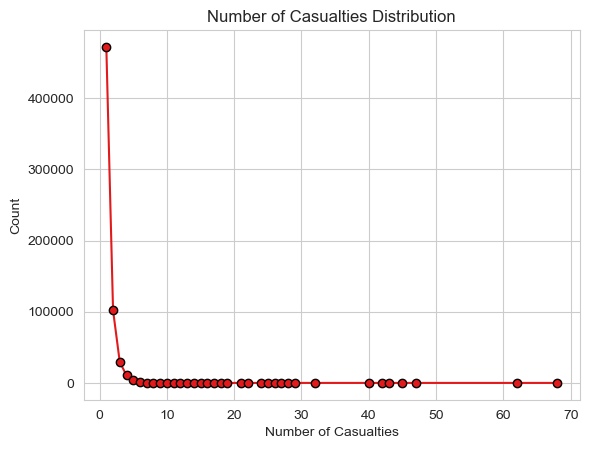

In [10]:
Number_of_Casualties = data.groupby('Number_of_Casualties')['Number_of_Casualties'].count()
colors = sns.color_palette("Paired")

plt.plot(Number_of_Casualties.index, 
         Number_of_Casualties.values, 
         marker='o', 
         linestyle='-', 
         color=colors[5], 
         markeredgecolor='black'
        )
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.title('Number of Casualties Distribution')
plt.grid(True)
plt.show()

fl.fig_caption("Number of Casualties",
               "Line chart of the distribution of Number of Casualties.")

This illustrates the distribution of the number of casualties in the dataset, presenting a visual representation of the occurrences. The graph depicts the frequency of accidents based on the number of victims involved. A notable surge in casualties is observed in the range of near zeroes, indicating a higher frequency of accidents involving only one individual. Specifically, incidents with a single casualty occurred nearly 500,000 times. The downward trend suggests that accidents involving multiple individuals are less common compared to those with fewer victims.

### Number of Vehicle

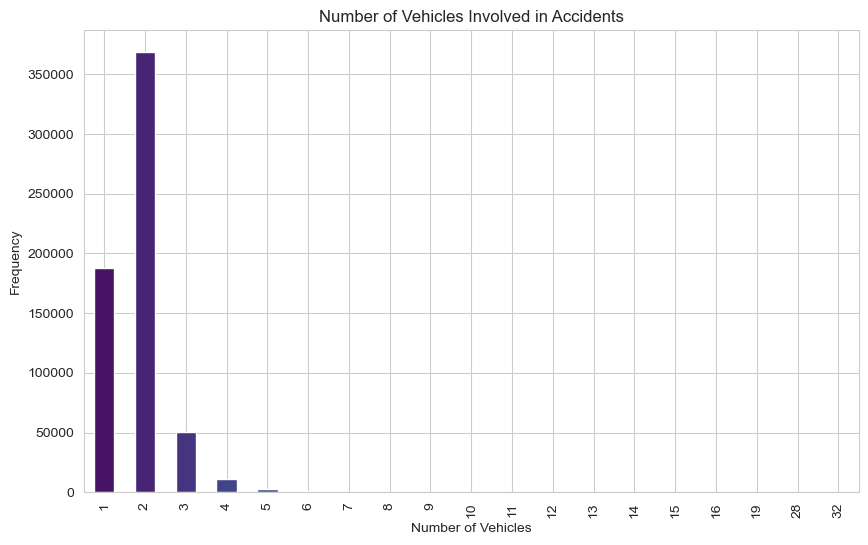

In [11]:
vehicle_counts = data['Number_of_Vehicles'].value_counts().sort_index()
number_of_vehicles_palette = sns.color_palette("viridis", 
                                               n_colors=len(vehicle_counts)
                                              )
plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', 
                    color=number_of_vehicles_palette
                   )
plt.title('Number of Vehicles Involved in Accidents')
plt.xlabel('Number of Vehicles')  
plt.ylabel('Frequency')
plt.show()

fl.fig_caption("Number of Vehicle",
               "Bar graph of the Number of Vehicles involved in an Accidents.")

This illustrates the number of vehicles involved in road accidents in the London district area. The graph shows that accidents involving two vehicles are most common, while those involving three or more vehicles are less frequent. The high occurrence of accidents with two vehicles suggests their significant role in collisions. This parallels the observation that accidents with fewer casualties tend to involve fewer vehicles as well.

### Road Surface Conditions Distribution

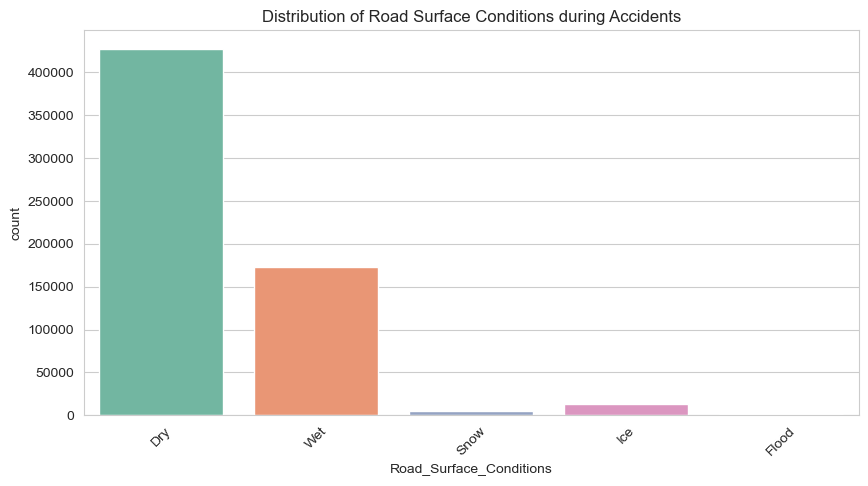

In [12]:
road_surface_palette = sns.color_palette("Set2", 
                                         n_colors=len(data['Road_Surface_Conditions']
                                                      .unique()
                                                     )
                                        )
plt.figure(figsize=(10, 5))
sns.countplot(x='Road_Surface_Conditions', 
              data=data, 
              palette=road_surface_palette
             )
plt.title('Distribution of Road Surface Conditions during Accidents')
plt.xticks(rotation=45)
plt.show()

fl.fig_caption("Road Surface Conditions",
               "Bar graph of the Road Surface Condition Distribution during Accidents.")

It displays a bar graph showing the distribution of road surface conditions. Dry roads have the highest count, followed by wet or damp conditions, while flood, frost, and snow have the lowest counts. This suggests that accidents are more frequent during dry or wet weather, with fewer incidents during adverse conditions like snowstorms.

### Weather Conditions Distribution

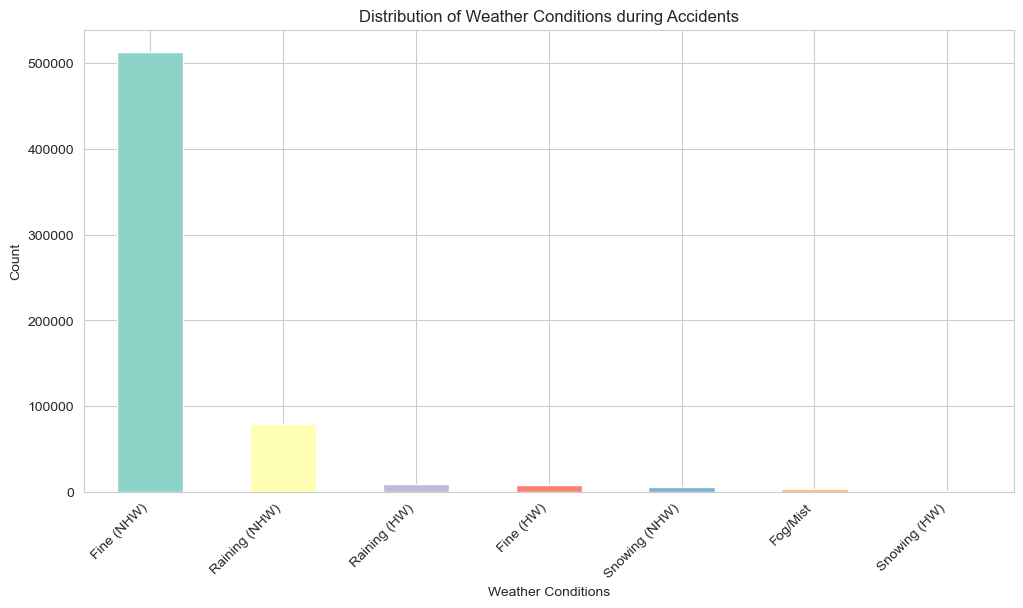

In [13]:
weather_conditions_palette = sns.color_palette("Set3", 
                                               n_colors=len(data['Weather_Conditions']
                                                            .unique()
                                                           )
                                              )
plt.figure(figsize=(12, 6))
data['Weather_Conditions'].value_counts().plot(kind='bar', 
                                               color=weather_conditions_palette
                                              )
plt.title('Distribution of Weather Conditions during Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45, 
           ha='right'
          )
plt.show()

fl.fig_caption("Weather Conditions",
               "Bar graph of the Weather Conditions Distribution during Accidents.")

It displays a bar graph showing the distribution of weather conditions during road accidents. "Fine with no high winds" is the most common condition, with over 400,000 incidents, followed by "rain with no high winds." This suggests that accidents frequently occur during fine weather with no high winds and on dry road surfaces.

### Vehicle Type Distribution

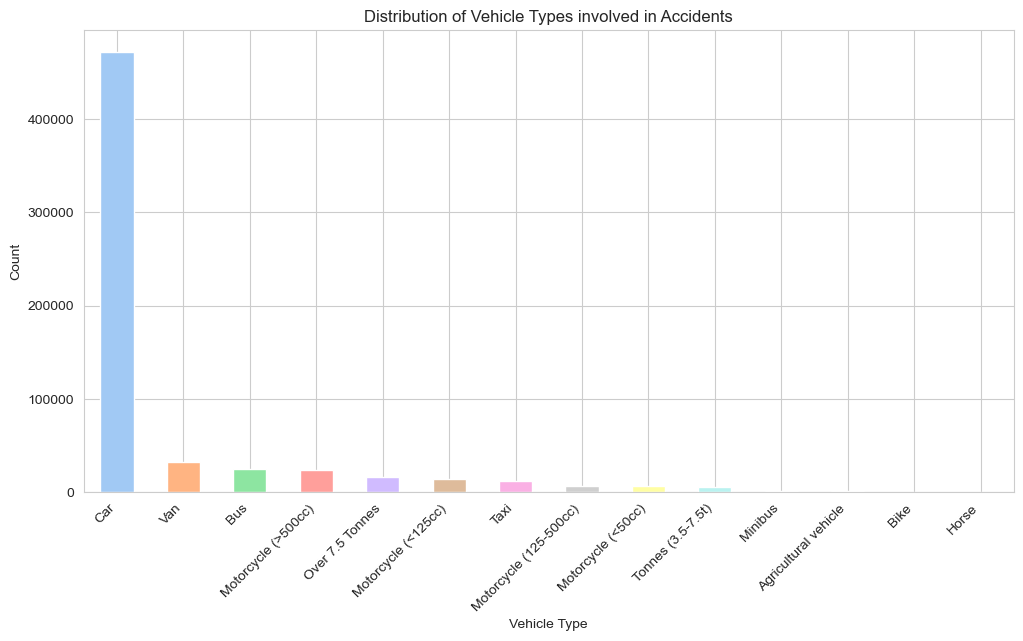

In [14]:
vehicle_type_palette = sns.color_palette("pastel", 
                                         n_colors=len(data['Vehicle_Type']
                                                      .unique()
                                                     )
                                        )
plt.figure(figsize=(12, 6))
data['Vehicle_Type'].value_counts().plot(kind='bar', 
                                         color=vehicle_type_palette
                                        )
plt.title('Distribution of Vehicle Types involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45, 
           ha='right'
          )
plt.show()

fl.fig_caption("Vehicle Type",
               "Bar graph of the Vehicle Type Distribution in Accidents.")

It depicts a bar graph illustrating the distribution of vehicles involved in road accidents. The graph highlights which vehicle types are most frequently involved in these incidents. The data clearly shows that cars have the highest count, indicating that they are the most common vehicle type involved in road accidents. Vans follow closely behind cars. This suggests that cars are the most prevalent vehicle type involved in road accidents.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions
***

The study of road accidents in London's district regions gives important information about a variety of components, including the number of casualties, vehicles involved, road surface conditions, weather conditions, and vehicle types.

*<b>Number of Casualties:* The data illustrates a distribution of casualties, indicating a higher frequency of accidents involving fewer individuals. This highlights the importance of addressing factors contributing to accidents with lower casualty counts to reduce overall road accident severity.

*<b>Number of Vehicles:* Accidents predominantly involve two vehicles, suggesting a common scenario of collisions between pairs of vehicles. Understanding the dynamics of dual-vehicle accidents is crucial for devising effective strategies to mitigate collision frequency and severity.

*<b>Road Surface Conditions:* Dry road conditions are associated with the highest number of accidents, followed by wet or damp surfaces. This underscores the need for targeted safety measures during both dry and wet weather conditions to mitigate accident risks.

*<b>Weather Conditions:* Fine weather without high winds correlates with the highest number of accidents, followed by rainy weather without high winds. Identifying weather-related patterns in accidents can inform proactive measures to address weather-related road safety challenges.
    
*<b>Vehicle Types:* Cars emerge as the most prevalent vehicle type involved in accidents, followed by vans. Understanding the role of vehicle types in accidents is crucial for implementing tailored safety measures to reduce accident frequency and severity, particularly for the most common vehicle types involved.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

In conclusion, the analysis highlights the significant influence of various factors, including the number of casualties and vehicles, on road accident severity in London's district areas. **Accidents with fewer vehicles** tend to result in higher casualties, possibly due to higher speeds and limited collision dynamics. **Fine weather conditions with no high winds** and rainy weather without high winds are associated with the highest number of casualties. **Dry road conditions** contribute to the highest number of casualties. **Cars** emerge as the most common vehicle type involved in accidents, with accidents involving **two vehicles** leading to increased casualties. *Despite variations across London districts, slight accident severity remains prevalent, suggesting a consistent need for preventive measures*. Recommendations include implementing speed reduction measures on less congested roads, enhancing safety protocols for various weather conditions, promoting safe driving practices, and investing in infrastructure improvements to enhance road safety standards throughout London. Additionally, further investigation through multivariate analysis could provide a more holistic understanding of how these factors interact and contribute to accident risk.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

Nezukokamaado, S. (2023, December 19). Road accident casualties dataset. Kaggle. https://www.kaggle.com/datasets/nezukokamaado/road-accident-casualties-dataset?select=accident%2Bdata.csv

[ref]: #top
[Back to Table of Contents][ref]